Stock Market analysis based on Trendz, Volatlity and returns

Data Collection and Preparation

In [1]:
import os
import pandas as pd
stocks_data = pd.read_csv('stocks.csv')
stocks_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [12]:
stocks_data.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [13]:
stocks_data.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [15]:
stocks_data.shape

(248, 8)

In [16]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [2]:
stocks_data.Ticker.value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [3]:
descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


Quantitive Analysis

In [17]:
lowest_amount=stocks_data.groupby('Ticker')['Close'].min()
highest_amount=stocks_data.groupby('Ticker')['Close'].max()

print(lowest_amount,highest_amount)

Ticker
AAPL    145.309998
GOOG     89.349998
MSFT    246.270004
NFLX    292.760010
Name: Close, dtype: float64 Ticker
AAPL    173.570007
GOOG    109.459999
MSFT    310.649994
NFLX    366.829987
Name: Close, dtype: float64


In [19]:
#compute the average closing price for each stock
avg_close_price=stocks_data.groupby('Ticker')['Close'].mean()
print('avg price is',avg_close_price)

avg price is Ticker
AAPL    158.240645
GOOG    100.631532
MSFT    275.039839
NFLX    327.614677
Name: Close, dtype: float64


In [20]:
# compute the standard deviation of closing prices for each stock
volatility_std = stocks_data.groupby('Ticker')['Close'].std()
print(volatility_std)

Ticker
AAPL     7.360485
GOOG     6.279464
MSFT    17.676231
NFLX    18.554419
Name: Close, dtype: float64


In [22]:
# Count the number of trading days for each stock
trading_days_count = stocks_data.groupby('Ticker')['Date'].count()
print(trading_days_count)

Ticker
AAPL    62
GOOG    62
MSFT    62
NFLX    62
Name: Date, dtype: int64


Trend Analysis

In [25]:
# Calculate moving averages
stocks_data['50_day_MA'] = stocks_data['Close'].rolling(window=50).mean()
stocks_data['200_day_MA'] = stocks_data['Close'].rolling(window=200).mean()

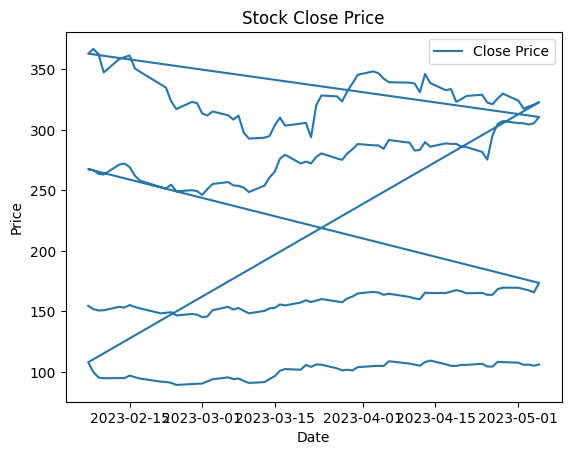

In [30]:
import matplotlib.pyplot as plt

# Plotting Close Price
plt.plot(stocks_data['Date'], (stocks_data['Close']), label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price')
plt.legend()
plt.show()

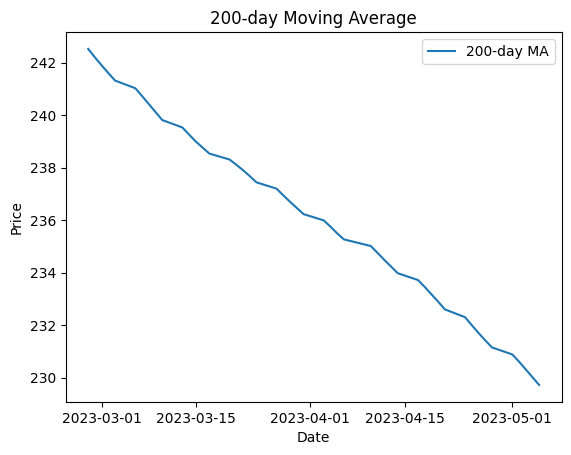

In [32]:
import matplotlib.pyplot as plt

# Plotting 200-day Moving Average
plt.plot(stocks_data['Date'], stocks_data['200_day_MA'], label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('200-day Moving Average')
plt.legend()
plt.show()

Chart for Each Individual Stock

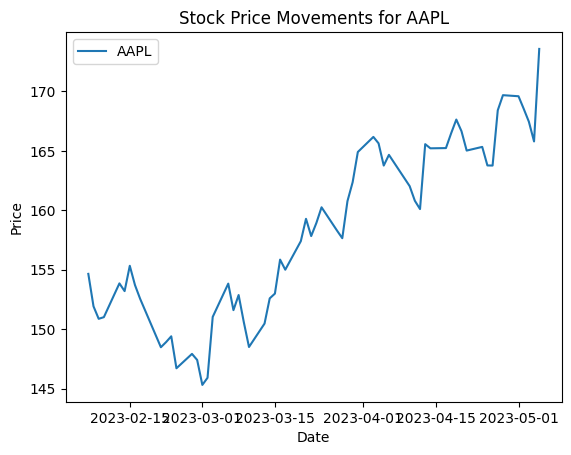

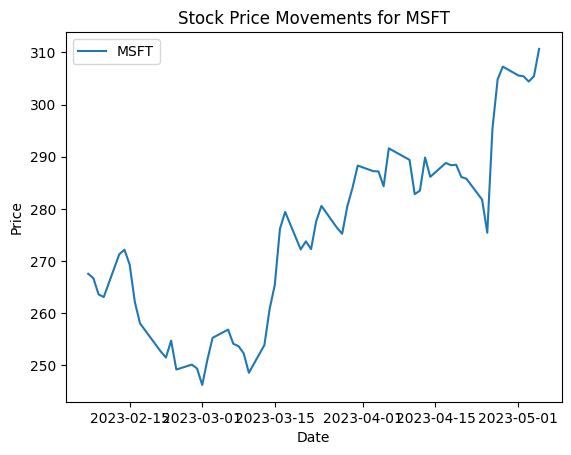

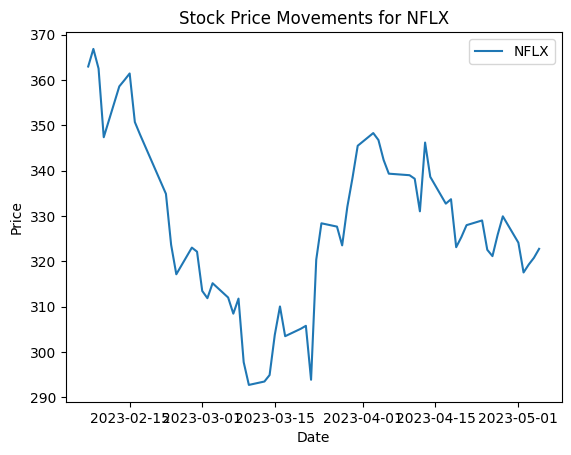

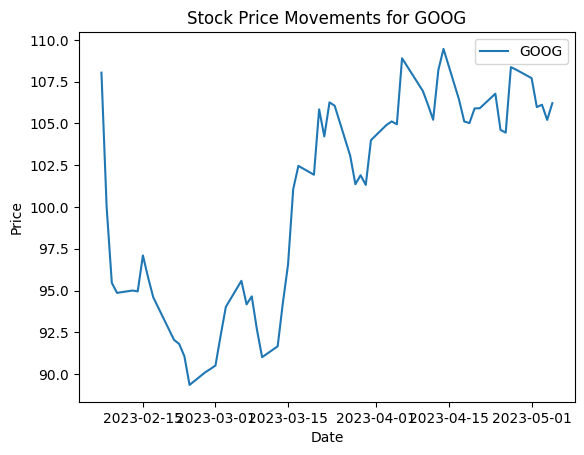

In [33]:
# It will generate individual graphs for each stock, showing its price movements over time
import matplotlib.pyplot as plt

# Get unique ticker symbols
ticker_symbols = stocks_data['Ticker'].unique()

# Iterate over each ticker symbol
for ticker in ticker_symbols:
    # Filter DataFrame for the current ticker symbol
    stock_data = stocks_data[stocks_data['Ticker'] == ticker]

    # Plotting stock price movements
    plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Stock Price Movements for {ticker}')
    plt.legend()
    plt.show()

Histogram Representation

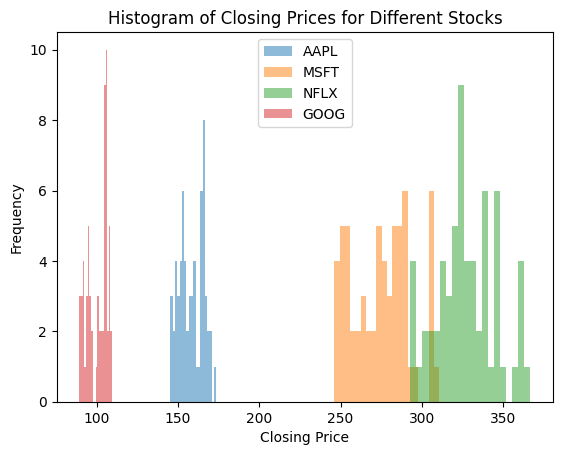

In [34]:
import matplotlib.pyplot as plt

# Example DataFrame with stock market data including 'Ticker' and 'Close' columns
# Assume df contains the necessary data
# df = ...

# Get unique ticker symbols
ticker_symbols = stocks_data['Ticker'].unique()

# Plot histograms for closing prices of each stock
for ticker in ticker_symbols:
    stock_data = stocks_data[stocks_data['Ticker'] == ticker]
    plt.hist(stock_data['Close'], bins=20, alpha=0.5, label=ticker)

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices for Different Stocks')
plt.legend()
plt.show()

Time Series Analysis

In [4]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['AAPL'],name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['GOOG'],name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['NFLX'],name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['MSFT'],name='MSFT'))

fig.update_layout(
    title_text="Time Series of Closing Prices",
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()

Volatility Analysis

In [5]:
volatility = pivot_data.std()
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={
        'y':'Standard Deviation',
        'x':'Ticker'
    },
    title='Volatility of Closing Prices (Standard Deviation)'
    )
fig.show()

Correlation Analysis

In [6]:
correlation_matrix = pivot_data.corr()
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='blues',
        colorbar=dict(title='correlation'),
        text=correlation_matrix.round(2).values,
        texttemplate="%{text}"
    )
)
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title="Ticker",
    yaxis_title="Ticker",
)
fig.show()

Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well. Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other. Values around 0 indicate a lack of correlation. From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.

Comparative Analysis

In [7]:
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100
fig = px.bar(
    percentage_change,
    x=percentage_change.index,
    y=percentage_change.values,
    labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
    title='Percentage Change in Closing Prices'
    )
fig.show()

Daily Risk v/s Return Analysis

In [8]:
daily_returns = pivot_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=risk_return_df["Risk"],
        y=risk_return_df['Average Daily Return'],
        mode="markers+text",
        text=risk_return_df.index,
        textposition="top center",
        marker=dict(size=10)
    )
)
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)
fig.show()

AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns. GOOG has higher volatility than AAPL and, on average, a slightly negative daily return, indicating a riskier and less rewarding investment during this period.

MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL. NFLX exhibits the highest risk and a negative average daily return, indicating it was the most volatile and least rewarding investment among these stocks over the analyzed period.